In [67]:
from tensorflow import keras
from tensorflow.keras import datasets,layers,models,losses
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image

In [68]:
datasets=datasets.mnist
(x_train,y_train),(x_test,y_test)=datasets.load_data()
print(x_train.shape)
x_train,x_test=(x_train).reshape(-1,28,28,1),(x_test).reshape(-1,28,28,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
uint8


In [55]:
model=models.Sequential()
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))#Droput层0.2丢弃率
model.add(layers.Dense(10,activation='softmax'))

In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                36928     
__________

In [57]:
# model.compile(optimizer='adam',
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
             loss=keras.losses.sparse_categorical_crossentropy,
             metrics=['accuracy'])

In [62]:
epochs=7
history=model.fit(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 25s 420us/step - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0289 - val_acc: 0.9928
Epoch 2/7
60000/60000 [==============================] - 26s 436us/step - loss: 0.0099 - acc: 0.9968 - val_loss: 0.0410 - val_acc: 0.9899
Epoch 3/7
60000/60000 [==============================] - 27s 451us/step - loss: 0.0107 - acc: 0.9966 - val_loss: 0.0408 - val_acc: 0.9905
Epoch 4/7
60000/60000 [==============================] - 27s 455us/step - loss: 0.0096 - acc: 0.9968 - val_loss: 0.0329 - val_acc: 0.9925
Epoch 5/7
60000/60000 [==============================] - 27s 454us/step - loss: 0.0075 - acc: 0.9976 - val_loss: 0.0570 - val_acc: 0.9894
Epoch 6/7
60000/60000 [==============================] - 27s 455us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.0382 - val_acc: 0.9929
Epoch 7/7
60000/60000 [==============================] - 27s 457us/step - loss: 0.0075 - acc: 0.9977 - val_loss: 0.0379 - 

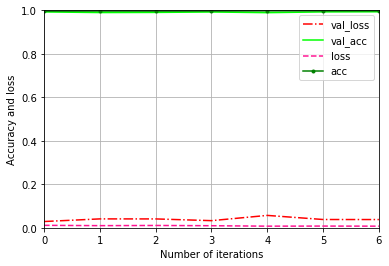

In [63]:
pd.DataFrame(history.history).plot(color=['red','lime','deeppink','green'],style=['-.','-','--','.-'])
plt.grid(True)#显示网格线
plt.ylim(0,1)
plt.xlim(0,epochs-1)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy and loss')
plt.xticks(range(0,epochs))
plt.legend(loc='best')
plt.show()

In [64]:
test_loss,test_acc=model.evaluate(x_test,y_test)

10000/10000 [==============================] - 1s 139us/step


In [65]:
print("test_loss:{:.5f},test_acc:{:.2f}%".format(test_loss,100*test_acc))
model.save("./cnn.h5")

test_loss:0.03791,test_acc:99.34%


In [66]:
new_model=keras.models.load_model("./cnn.h5")

In [2]:
from PIL import Image
img=Image.open("D:/desktop/9.png")
img=img.resize((28,28),Image.ANTIALIAS).convert('L')#resize([宽度,高度]),ANTIALIAS抗锯齿
tv = list(img.getdata())  # 获取图片像素值
tva = [(255-x) / 255.0 for x in tv]  # 转换像素范围到[0 1], 0是纯白 1是纯黑
img_new=np.array(tva).reshape(28,28)
plt.imshow(img_new)
plt.show()
print(new_model.predict_classes(img_new.reshape(-1,28,28,1)))

[255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 253,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 251,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 251,
 255,
 255,
 252,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 246,
 255,
 255,
 255,
 252,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 254,
 254,
 226,
 66,
 207,
 255,
 252,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 252,
 254,
 168,
 78,
 140,
 223,
 255,
 255,
 252,
 255,
 255,
 255,
 255,
 255,
 255,
 253,
 255,
 184,
 43,
 152,
 255,
 253,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 254,
 255,
 216,
 132,
 65,
 97,
 221,
 255,
 254,
 255,
 255,
 254,
 254,
 255,
 255,
 254,
 255,
 233,
 34,
 153,
 255,
 253,
 255,
 255,
 254,
 255,
 255,
 255,
 255,
 255,
 255,
 255,
 247,
 142,
 33,
 167,
 254,
 253,
 255,
 255,
 255,
 255,
 255,
 255,
 250,
 255,
 204,
 79,
 253,
 253,
 251,
 253,
 255,
 255,
